In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/My Drive/ML

/content/gdrive/My Drive/ML


# Scatter Plots for norm values: 2, 1, 0.4 

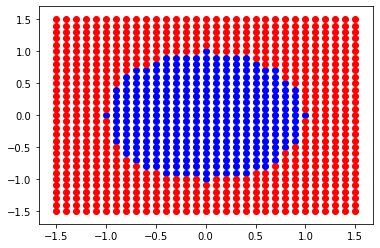

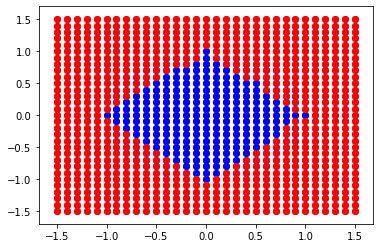

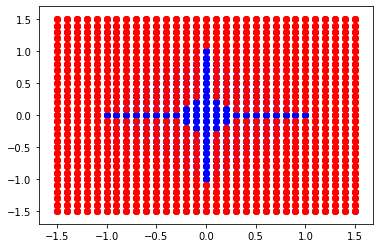

In [39]:
import numpy as np
import matplotlib.pyplot as plt


coordinates = []
class1 = []
class2 = []

def create_dataset(space):
  coordinates.clear()
  for x in np.linspace(-1.5, 1.5, space):
   for y in np.linspace(-1.5, 1.5, space):
    coordinates.append((x, y))
  return coordinates

# Creating coordinates with space of 0.1 between them
training_coordinates = create_dataset(31) 

# seperating them into classes based on the norm condition
def create_training_data(normValue):
  for x in training_coordinates:
    if(np.linalg.norm(x, normValue) <= 1):
      class1.append(x)
    else:
      class2.append(x)

# scattering the points with different colors
def scatter(normValue):
    for x in class1:
        plt.scatter(x[0], x[1], c = 'b')

    for y in class2:
        plt.scatter(y[0], y[1], c = 'r')
    plt.show()
norm_values = [2, 1, 0.4]

for norm in norm_values:
  create_training_data(norm)
  scatter(norm)


# Knn Implementation and Contour plot for k values: 5, 25, 50 and Norm: 2

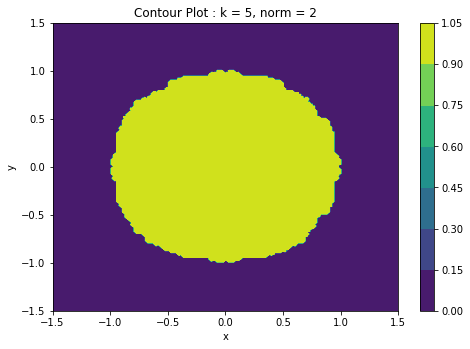

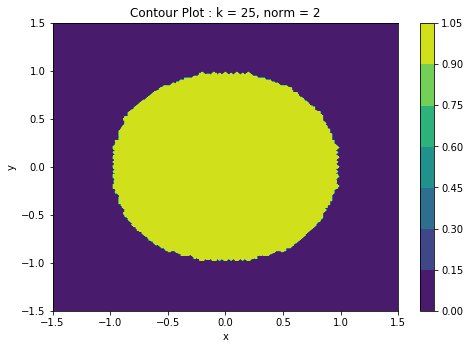

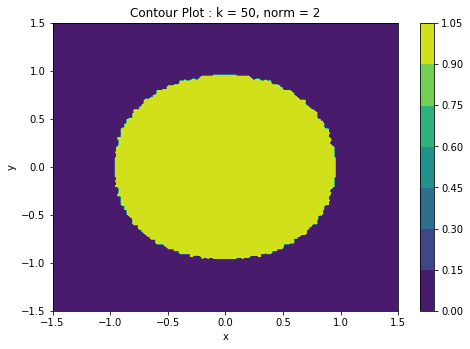

In [40]:
import numpy as np
from collections import Counter
from datetime import datetime

# creating all the required lists
neighbors = []
test_data = []
training_coordinates = []
training_data = []
labels = []
mMatrix1 = []
knnResult = []


k = [5, 25, 50]
norm_values = [2, 1, 0.4]
x_vals = np.linspace(-1.5, 1.5, 301)
y_vals = np.linspace(-1.5, 1.5, 301)

for x in x_vals:
  for y in y_vals:
    test_data.append((x, y))
training_coordinates = create_dataset(31)

def train(norm):
  training_data.clear()
  labels.clear()
  for x in training_coordinates:
    if(np.linalg.norm(x, norm) <= 1):
      label = 1
      training_data.append(x)
      labels.append(label)
    else:
      class2.append(x)
      label = 0
      training_data.append(x)
      labels.append(label)

# Predict method which takes training data as input and predicts the class of test data points
def predict(normValue, k_val, training_data):
  # clearing the result from knn for different norm and k values
  knnResult.clear()
  global test_data, mMatrix1, labels
  training_data = np.asarray(training_data)
  for index in range(len(test_data)):  
    test_data_point = np.asarray(test_data[index])
    # list to store the distances from test data point to the training data
    distance_list = np.linalg.norm(training_data - test_data[index], normValue, axis=1)
    # mapping the calculated distances with the training labels
    mMatrix1 = np.rec.fromarrays([distance_list, labels])
    # sorting to get the nearest points label
    mMatrix1.sort()
    # taking the 1st k nearest neighbours
    mMatrix1 = mMatrix1[:k_val]
    # finding the most frequent label in the 1st k neighbours
    knnResult.append(np.bincount(mMatrix1.f1.reshape(-1).astype(int)).argmax())
  fig = plt.figure(figsize=(7.5,5))
  left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
  ax = fig.add_axes([left, bottom, width, height])
  ax.set_title('Contour Plot : k = ' + str(i) + ", norm = " + str(normValue))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  X, Y = np.meshgrid(x_vals, y_vals)
  Z = np.asarray(knnResult)
  # plotting the labels onto a contour plot
  cp = plt.contourf(X, Y, Z.reshape(X.shape[0], X.shape[1]))
  plt.colorbar(cp)
  plt.show()

# creating the training data based in euclidean distance
train(2)
for i in k:
  # predicting for different values of k
  predict(2, i, training_data)

# It will take approximately 55 seconds for generating contour plot


# Contour Plots when norm = 1

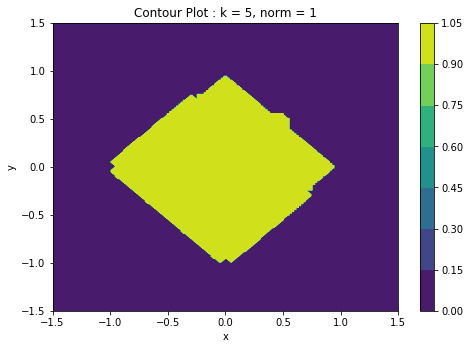

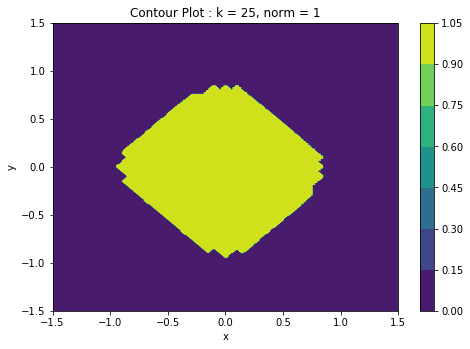

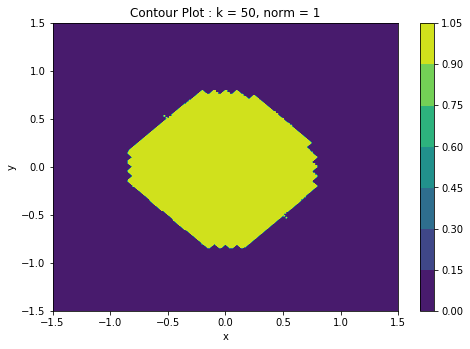

In [41]:
train(1)
for i in k:
  predict(1, i, training_data)
# It will take approximately 55 seconds for generating contour plot

# Contour Plots when norm = 0.4

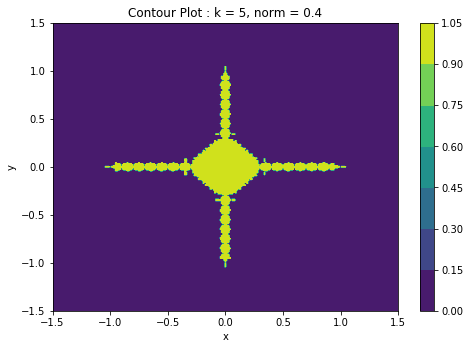

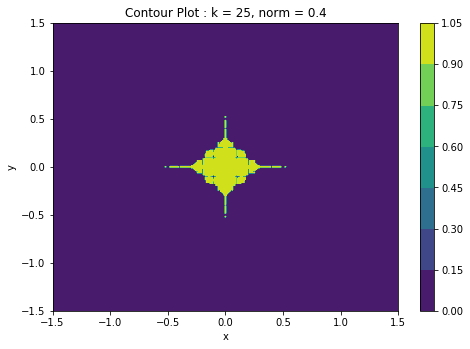

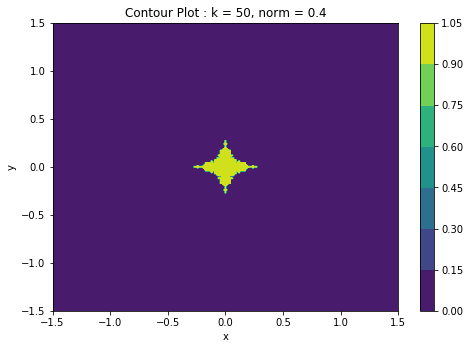

In [42]:
train(0.4)
for i in k:
  predict(0.4, i, training_data)
# It will take approximately 55 seconds for generating 1 contour plot

# Observations

As it is shown in the contour plots above, for the lower values of k, it underfits the data as there are not much neighbours to work with. As the value of k increases, it classifies the data in a better way till certain point after which it overfits the data. For the synthetic data that we created, the optimal value of k would range from 5 to 15 to avoid overfitting and underfitting.

Regarding the norm value to consider, the classification is very smooth if we use euclidean distance. As we can see the contour plots when we use norm values 0.4 and 1, there is a bit of underfitting of data. Euclidean distance is the optimal distance for low dimensional data as it is the usual distance that we use in the real world.

# 2. a. Knn on Mnist data

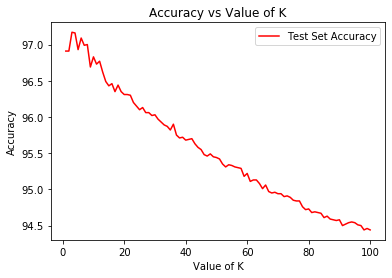

Maximum Accuracy : (97.17,)  at K : 3


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv

# predict method
def predict(train_data, test_data, mnist_numbers, test_numbers):
  distance_list_mnist = []
  for x in test_data:
    # taking the differences of test data point from training data
    dist = train_data - x
    # squaring the distances
    distance_list_mnist.append(np.einsum('ij, ij->i', dist, dist).reshape(len(train_data), 1))
  mappedMatrix = []
  for i in distance_list_mnist:
    # mapping the elements in distance list and input labels from training data
    mMatrix = np.concatenate((i.reshape(-1, 1), mnist_numbers), axis=1)
    # sorting the mapped distances to get the nearest neighbours
    mMatrix = mMatrix[mMatrix[:, 0].argsort()][:, 1]
    mappedMatrix.append(mMatrix)
  mappedMatrix = np.asarray(mappedMatrix)
  mappedMatrix = mappedMatrix.reshape(len(test_data), len(train_data))
  kValRange = 100
  k_test_dict = {}
  for i in range(kValRange):
    i += 1 
    k_test_dict[i] = 0

  for k in k_test_dict.keys():
    kMatrix = []
    for i in mappedMatrix:
      # finding the first k neighbours
      i = i[:k]
      kMatrix.append(i)
    knnResult = []
    for j in kMatrix:
      b = Counter(j)
      # finding the most frequent neighbour
      knnResult.append(int(b.most_common(1)[0][0]))
    knnResult = np.asarray(knnResult)
    knnResult = knnResult.reshape(len(test_data), 1)
    # finding the accuracy of the test data
    k_test_dict[k] = (np.sum(knnResult == test_numbers)/len(test_data))*100
  x, y_error1 = zip(*sorted(k_test_dict.items()))
  fig = plt.figure()
  plt.title('Accuracy vs Value of K')
  plt.plot(x, y_error1, 'r', label='Test Set Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Value of K')
  plt.legend()
  plt.show()

  maxAccuracy = max(zip(k_test_dict.values()))
  for key, value in k_test_dict.items(): 
    if maxAccuracy == value: 
      maxAccuracyKValue = key
  print("Maximum Accuracy : " + str(maxAccuracy) + "  at K : " + str(maxAccuracyKValue))

def train():
  # loading test and train data from drive
  train_matrix_loaded = np.genfromtxt('mnist_train.csv', delimiter=',')
  test_matrix_loaded = np.genfromtxt('mnist_test.csv', delimiter=',')
  # taking the 1st column which contains the number represented by the row
  mnist_numbers = train_matrix_loaded[:, :1]
  test_numbers = test_matrix_loaded[:, :1]
  train_matrix = train_matrix_loaded[:, 1:]
  test_matrix = test_matrix_loaded[:, 1:]
  predict(train_matrix, test_matrix, mnist_numbers, test_numbers)

train()

# 2. c. Knn on Reduced resolution images

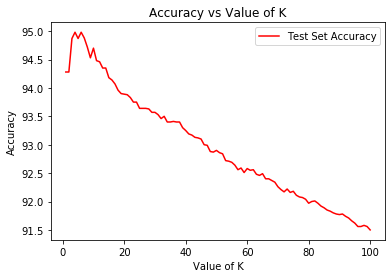

Maximum Accuracy : (94.98,)  at K : 6


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv

def train():
  # loading the train and test data from drive
  train_matrix_loaded = np.genfromtxt('mnist_train.csv', delimiter=',')
  test_matrix_loaded = np.genfromtxt('mnist_test.csv', delimiter=',')
  train_matrix1 = train_matrix_loaded[:, 1:]
  test_matrix1 = test_matrix_loaded[:, 1:]
  # slicing the images by taking mean of 4 columns which reduces the image to 14*14
  train_matrix_reduced = 0.25*(train_matrix1[0::1, 0::4] + train_matrix1[0::1, 1::4])
  test_matrix_reduced = 0.25*(test_matrix1[0::1, 0::4] + test_matrix1[0::1, 1::4])
  mnist_numbers = train_matrix_loaded[:, :1]
  test_numbers = test_matrix_loaded[:, :1]
  predict(train_matrix_reduced, test_matrix_reduced, mnist_numbers, test_numbers)
train()

# 2. b. Knn on different amounts of mnist data

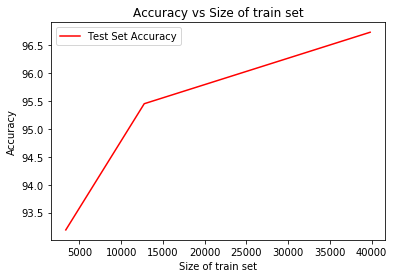

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv

# made few modifications to the predict method used above to accommodate plotting accuracy based on data set size
def predict(train_data, test_data, train_labels, test_numbers, kValFor2B, size_accuracy_dict):

  distance_list_mnist = []
  for x in test_data:
    # taking the differences of test data point from training data
    dist = train_data - x
    # Squaring the distances
    distance_list_mnist.append(np.einsum('ij, ij->i', dist, dist).reshape(len(train_data), 1))
  mappedMatrix = []
  for i in distance_list_mnist:
    # mapping the elements in distance list and input labels from training data
    mMatrix = np.concatenate((i.reshape(-1, 1), train_labels.reshape(-1, 1)), axis=1)
    # sorting to get the nearest neighbours
    mMatrix = mMatrix[mMatrix[:, 0].argsort()][:, 1]
    mappedMatrix.append(mMatrix)
  mappedMatrix = np.asarray(mappedMatrix)
  mappedMatrix = mappedMatrix.reshape(len(test_data), len(train_data))

# KValFor2B is 3, as the maximum accuracy on test data was achieved when k = 3
  kMatrix = []
  for i in mappedMatrix:
    i = i[:kValFor2B]
    kMatrix.append(i)
  knnResult = []

  for j in kMatrix:
    b = Counter(j)
    knnResult.append(int(b.most_common(1)[0][0]))

  knnResult = np.asarray(knnResult)
  knnResult = knnResult.reshape(len(test_data), 1)
  size_accuracy_dict[len(train_data)] = (np.sum(knnResult == test_numbers)/len(test_data))*100
 
def train(size_accuracy_dict):
  # taking random sizes varying between 100 and 60000
  sizes = np.random.randint(100, 60000, (3,))
  train_matrix = np.genfromtxt('mnist_train.csv', delimiter=',')
  test_matrix = np.genfromtxt('mnist_test.csv', delimiter=',')
  test_numbers = test_matrix[:, :1]
  test_matrix = test_matrix[:, 1:]
  # shuffling the train matrix to accommodate slicing in an efficient manner
  np.random.shuffle(train_matrix)
  for size in sizes:
    size_accuracy_dict[size] = 0
    # slicing the matrix based on random sizes genearted
    train_matrix_set = train_matrix[:size, 1:]
    train_labels = train_matrix[:size, 0]
    # passing 3 as parameter as maximum accuracy was achieved when k =3
    predict(train_matrix_set, test_matrix, train_labels, test_numbers, 3, size_accuracy_dict)

size_accuracy_dict = {}
train(size_accuracy_dict)

x, y_error1 = zip(*sorted(size_accuracy_dict.items()))
fig = plt.figure()
plt.title('Accuracy vs Size of train set')
plt.plot(x, y_error1, 'r', label='Test Set Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Size of train set')
plt.legend()
plt.show()

# 4. a. Decision Tree Classifier using sklearn

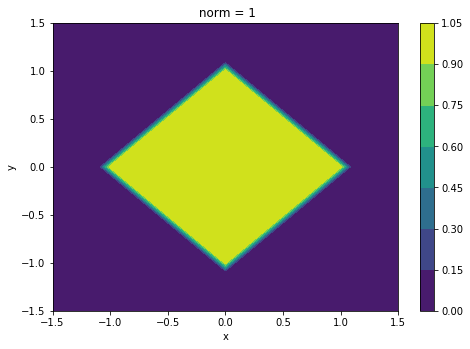

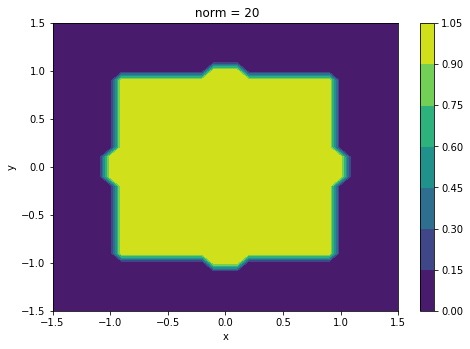

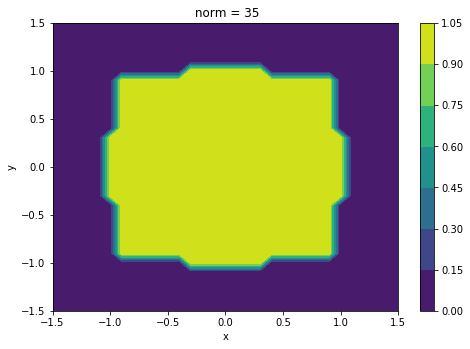

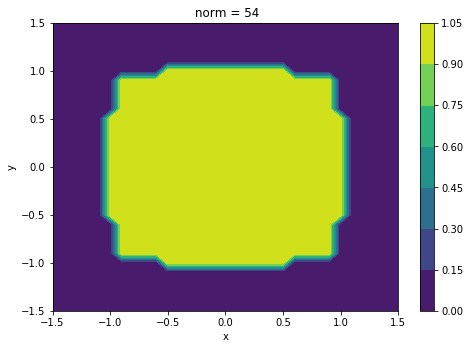

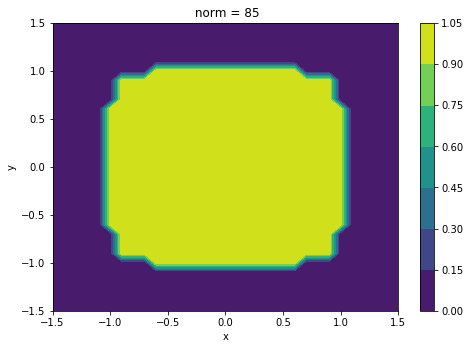

In [43]:
import numpy as np
import sklearn as sk
from sklearn import tree
import matplotlib.pyplot as plt

test_data = []
training_coordinates = []
training_data = []
labels = []

# creating coordinates to create training data with labels
def create_dataset(space):
    coordinates.clear()
    for x in np.linspace(-1.5, 1.5, space):
        for y in np.linspace(-1.5, 1.5, space):
            coordinates.append((round(x, 1), round(y, 1)))
    return coordinates
test_data = create_dataset(31) 
training_coordinates = create_dataset(31)

# generates training data and labels
def generate_data(norm):
  training_data.clear()
  labels.clear()
  for x in training_coordinates:
      if(np.linalg.norm(x, norm) <= 1):
          label = 1
          training_data.append(x)
          labels.append(label)

      else:
          label = 0
          training_data.append(x)
          labels.append(label)
  return training_data, labels
normValues = [1, 20, 35, 54, 85]
x_vals = np.linspace(-1.5, 1.5, 31)
y_vals = np.linspace(-1.5, 1.5, 31)
for norm in normValues:
  training_data, labels = generate_data(norm)
  clf = tree.DecisionTreeClassifier()
  # training the decision tree classifier with the generated  training data and labels
  clf = clf.fit(training_data, labels)
  fig = plt.figure(figsize=(7.5,5))
  left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
  ax = fig.add_axes([left, bottom, width, height])
  ax.set_title(' norm = ' + str(norm))
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  X, Y = np.meshgrid(x_vals, y_vals)
  # plotting the results from decision tree classifier 
  Z = clf.predict(test_data)
  cp = plt.contourf(X, Y, Z.reshape(X.shape[0], X.shape[1]))
  plt.colorbar(cp)
  plt.show()

# 4. b. decision tree classifier with different max_depth values and criterion

In [47]:
import numpy as np
import sklearn as sk
from sklearn import tree
import matplotlib.pyplot as plt
# loading traning and test data from drive
train_matrix = np.genfromtxt('mnist_train.csv', delimiter=',')
test_matrix = np.genfromtxt('mnist_test.csv', delimiter=',')
test_labels = test_matrix[:, :1]
test_matrix = test_matrix[:, 1:]
# generating random sizes to slice the training data
sizes = np.random.randint(100, 60000, (3,))
sizes = sizes.tolist() 
# adding 60000 to include the complete training set
sizes.append(60000)
# shuffling the train data
np.random.shuffle(train_matrix)
for size in sizes:
  print("Train data set size: " + str(size))
  train_matrix_set = train_matrix[:size, 1:]
  train_labels = train_matrix[:size, 0]
  # taking the maximum depth values to perform classification
  maxDepthVals = [1, 5, 10, 15, 20, 25]
  # initializing dictionary to store accuracy
  AccuracyVals = { 1:0, 5:0, 10:0, 15:0, 20:0, 25:0}
  criterionVals = ['gini', 'entropy']
  for depth in maxDepthVals:
    for crit in criterionVals:
      # passing gini and entropy as parameters for decision tree classifier
      clf = tree.DecisionTreeClassifier(criterion=crit, max_depth=depth)
      # training different sizes of training data and labels
      clf = clf.fit(train_matrix_set, train_labels)
      # getting the classification accuracy for different sizes of training data and labels
      prediction = clf.score(train_matrix_set, train_labels)
      # getting the classification accuracy for test data and labels
      predictionForTestSet = clf.score(test_matrix, test_labels)
      print("Max Depth: " + str(depth) + ",  Criterion: " + crit + ",  Accuracy: " + str(prediction*100))
      print("Test Data Set :  Max Depth: " + str(depth) + ",  Criterion: " + crit + ",  Accuracy: " + str(predictionForTestSet*100))
      AccuracyVals[depth] = prediction*100


Train data set size: 34807
Max Depth: 1,  Criterion: gini,  Accuracy: 19.338064182492026
Test Data Set :  Max Depth: 1,  Criterion: gini,  Accuracy: 19.63
Max Depth: 1,  Criterion: entropy,  Accuracy: 18.642801735283133
Test Data Set :  Max Depth: 1,  Criterion: entropy,  Accuracy: 18.26
Max Depth: 5,  Criterion: gini,  Accuracy: 68.63561927198552
Test Data Set :  Max Depth: 5,  Criterion: gini,  Accuracy: 68.85
Max Depth: 5,  Criterion: entropy,  Accuracy: 69.51187979429425
Test Data Set :  Max Depth: 5,  Criterion: entropy,  Accuracy: 69.84
Max Depth: 10,  Criterion: gini,  Accuracy: 90.78059011118454
Test Data Set :  Max Depth: 10,  Criterion: gini,  Accuracy: 85.31
Max Depth: 10,  Criterion: entropy,  Accuracy: 92.6738874364352
Test Data Set :  Max Depth: 10,  Criterion: entropy,  Accuracy: 86.38
Max Depth: 15,  Criterion: gini,  Accuracy: 98.55488838452035
Test Data Set :  Max Depth: 15,  Criterion: gini,  Accuracy: 86.31
Max Depth: 15,  Criterion: entropy,  Accuracy: 99.847731778

# Observations on Decision tree classifier

Based on the above results of running decision tree classifier on MNIST data, maximum accuracy was achieved at a max_depth of approximately 25 for both entropy and gini. Once it reaches the accuracy of 100%, it remains the same thereafter which indicates overfitting. Entropy and gini calculate the information gain differently, entropy uses logorithms which makes the calculations easier.  if we use entropy as criterion, the accuracy is a little bit better. As the value of max_depth increases, the accuracy of classification is increasing in a linear way and the accuarcy is decreasing with increase of size of data samples.

# Q. 3. The Curse of Dimensionality

In [21]:
from scipy import integrate

Z = lambda y, x: (x-y)**2
E = integrate.dblquad(Z, 0, 1, 0, 1)[0]
E

0.16666666666666666

In [22]:
z_squared = lambda y, x: (x-y)**4
V = integrate.dblquad(z_squared, 0, 1, 0, 1)[0] - (integrate.dblquad(f, 0, 1, 0, 1)[0])**2
V

0.03888888888888889

![Q.3.a](https://drive.google.com/uc?id=1EwE0GR8Tf86bXEaJK4wrd1rCuB6Z89xp)

![Q.3.a](https://drive.google.com/uc?id=1HVoKHp6BERDwVSpKJWxQgwv772nZNviS)

![Q.3.b](https://drive.google.com/uc?id=1P5DV0z8GRSTJFQkmgZNvlLX9GKkjIPz6)



---



# References
[linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)

[arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)

[reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

[norm](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)

[sk learn knn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[mesh grid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

[scatterplot](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/introduction-to-scatterplots/a/scatterplots-and-correlation-review)


[contour plot](https://www.tutorialspoint.com/matplotlib/matplotlib_contour_plot.htm)


[sort](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sort.html)

[counter](https://pymotw.com/2/collections/counter.html)

[sorted](https://www.w3schools.com/python/ref_func_sorted.asp)

[decision tree classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[scipy dblquad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html)

[variance and expectation](http://theanalysisofdata.com/probability/2_3.html)
